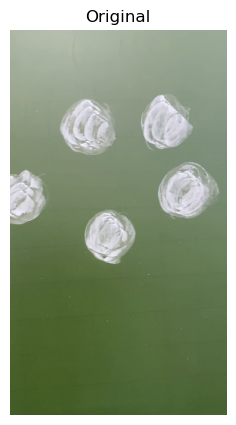

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

def plot_comparison(original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6), sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title("original")
    ax1.axis("off")
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis("off")
    
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()
    
def get_mask(image):
 # Tạo ra mặt nạ mask bao gồm nhiều điểm ảnh bị hỏng bằng phương pháp thủ công 
    mask = np.zeros(image.shape[:-1])
    mask[101:106, 0:240] = 1
    mask[152:154, 0:60] = 1
    mask[153:155, 60:100] = 1
    mask[154:156, 100:120] = 1
    mask[155:156, 120:140] = 1
    mask[212:217, 0:150] = 1
    mask[217:222, 150:256] = 1
    mask[50:106, 0:240] = 1
    #mask[100:280, 40:250] = 1
    
    return mask

cap = cv2.VideoCapture(r'D:\\video.mp4')

frame_index = 200 
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
ret, frame = cap.read()

if ret:
    fig = plt.figure(figsize=(10, 5))
   
   
gray_image = color.rgb2gray(frame)
show_image(frame, "Original")


C:\Users\PC\AppData\Local\Temp\ipykernel_17240\1692967107.py:9: FutureWarning: `multichannel` is a deprecated argument name for `inpaint_biharmonic`. It will be removed in version 1.0. Please use `channel_axis` instead.
  Resutl=inpaint.inpaint_biharmonic(frame, mask, multichannel=True)


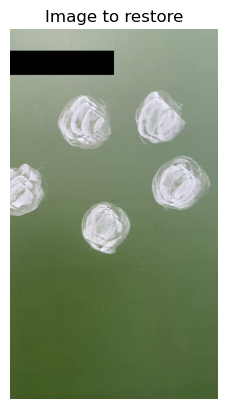

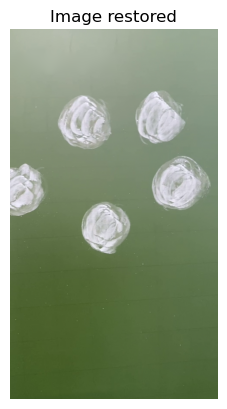

In [2]:
#Bài tập 3.1: Khôi phục ảnh bị hỏng

from skimage.restoration import inpaint

frame[50:106, 0:240] = 1

mask = get_mask(frame)

Resutl=inpaint.inpaint_biharmonic(frame, mask, multichannel=True)
show_image(frame, 'Image to restore')
show_image(Resutl, 'Image restored')


C:\Users\PC\AppData\Local\Temp\ipykernel_17240\3132612999.py:8: FutureWarning: `multichannel` is a deprecated argument name for `inpaint_biharmonic`. It will be removed in version 1.0. Please use `channel_axis` instead.
  image_logo_removed=inpaint.inpaint_biharmonic(Resutl, mask, multichannel=True)


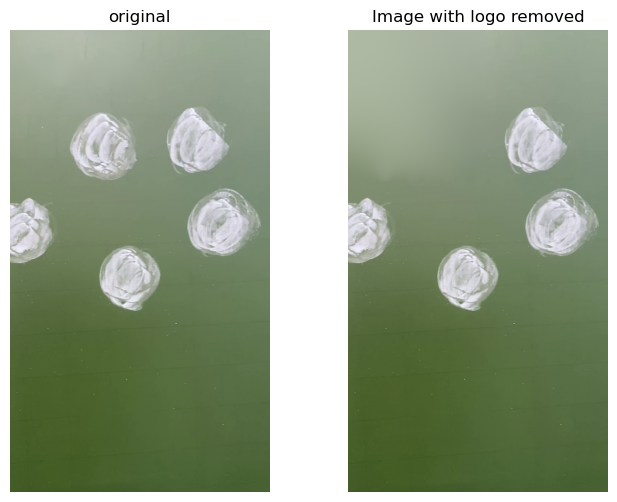

In [3]:
#Bài tập 3.2: Xóa logo

from skimage.restoration import inpaint

mask = np.zeros(frame.shape[:-1])
mask[0:280, 0:250] = 1

image_logo_removed=inpaint.inpaint_biharmonic(Resutl, mask, multichannel=True)

plot_comparison(Resutl, image_logo_removed,'Image with logo removed')


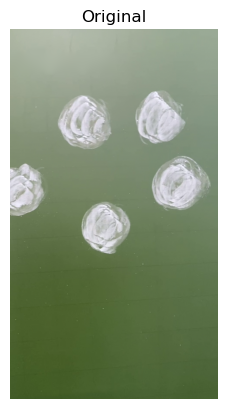

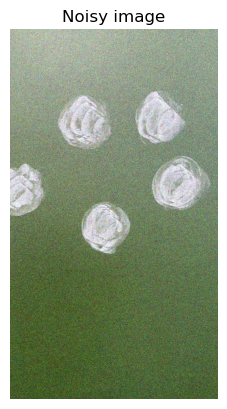

In [5]:
#Bài tập 3.3: Khởi tạo ảnh nhiễu

from skimage.util import random_noise
# Thêm nhiễu vào ảnh gốc
noisy_image = random_noise(Resutl)
show_image(Resutl,'Original')
show_image(noisy_image,'Noisy image')

C:\Users\PC\AppData\Local\Temp\ipykernel_17240\1010420534.py:6: FutureWarning: `multichannel` is a deprecated argument name for `denoise_tv_chambolle`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoised_image = denoise_tv_chambolle(noisy_image, weight=0.1, multichannel=True)


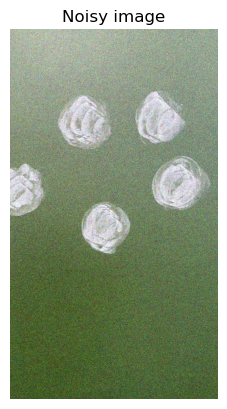

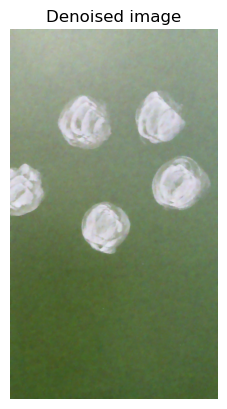

original noise ratio: 20.052895555790208
improved noise ratio: 34.26972919971082


In [19]:
#Bài tập 3.4: Giảm nhiễu

from skimage.metrics import peak_signal_noise_ratio
from skimage.restoration import denoise_tv_chambolle

denoised_image = denoise_tv_chambolle(noisy_image, weight=0.1, multichannel=True)
show_image(noisy_image,'Noisy image')
show_image(denoised_image,'Denoised image')
original_noise_ratio = peak_signal_noise_ratio(Resutl,noisy_image)
improved_noise_ratio = peak_signal_noise_ratio(Resutl,denoised_image)

print("original noise ratio:", original_noise_ratio)
print("improved noise ratio:", improved_noise_ratio)


C:\Users\PC\AppData\Local\Temp\ipykernel_17240\2330231872.py:7: FutureWarning: `multichannel` is a deprecated argument name for `denoise_bilateral`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoised_image = denoise_bilateral(noisy_image,multichannel=True)


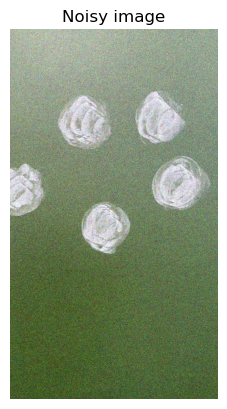

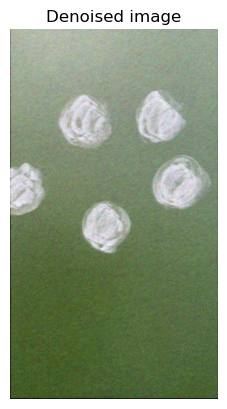

original noise ratio: 20.052895555790208
improved noise ratio: 27.930312281022132


In [20]:
#Bài tập 3.5: Giảm nhiễu bằng bộ lọc bilataral filter

from skimage.metrics import peak_signal_noise_ratio
from skimage.restoration import denoise_bilateral

# Áp dụng bộ lọc bilateral filter
denoised_image = denoise_bilateral(noisy_image,multichannel=True)
# Hiển thị kết quả để so sánh
show_image(noisy_image, 'Noisy image')
show_image(denoised_image, 'Denoised image')

original_noise_ratio = peak_signal_noise_ratio(Resutl,noisy_image)
improved_noise_ratio = peak_signal_noise_ratio(Resutl,denoised_image)

print("original noise ratio:", original_noise_ratio)
print("improved noise ratio:", improved_noise_ratio)


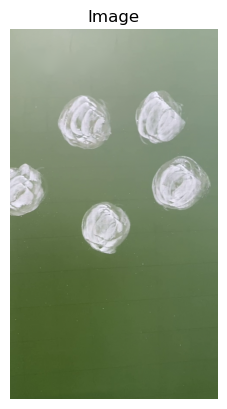

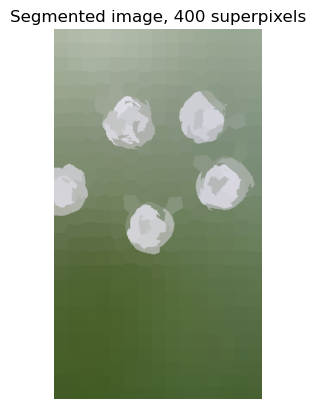

In [22]:
from skimage.segmentation import slic
from skimage.color import label2rgb

# Lấy ảnh đã được phân đoạn
segments = slic(Resutl, n_segments=400)

# Kết hợp kết quả phân đoạn với ảnh gốc, giá trị trung bình được sử dụng làm đại diện cho một nhóm các điểm ảnh
segmented_image = label2rgb(segments, Resutl, kind='avg')

show_image(Resutl)
show_image(segmented_image, "Segmented image, 400 superpixels")


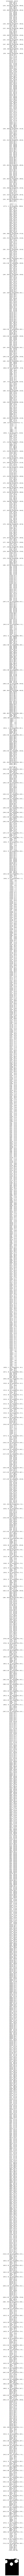

In [24]:
#Bài tập 3.8: Hình dạng đường bao của ảnh nhị phân

# Khai báo các thư viện cần dùng
from skimage import data, measure
from skimage.filters import threshold_otsu

gray_image1 = color.rgb2gray(Resutl)
# Tính toán ngưỡng bằng phương pháp otsu
thresh = threshold_otsu(gray_image1)
# Áp dụng kỹ thuật lấy ngưỡng.
binary = gray_image1 > thresh

# Tìm đường biên với tham số level phù hợp.
contours = measure.find_contours(binary, 0.8)
# Hiển thị kết quả với đường bao phù hợp
show_image(binary, contours)
# Tính diện tích và chu vi của đối tượng
Area = measure.regionprops(binary.astype(int))[0].area
Count = measure.regionprops(binary.astype(int))[0].perimeter

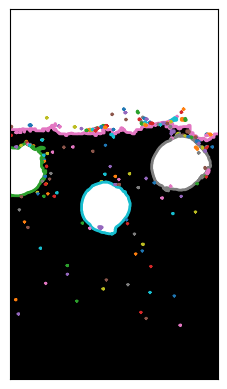

In [32]:
#Bài tập 3.9: Tìm đường bao của một ảnh màu

# khai báo thư viện cần thiết

from skimage import io, color, filters, feature
from skimage.filters import threshold_otsu

# Tạo ảnh xám từ ảnh màu ban đầu
gray = color.rgb2gray(Resutl)
# Tính ngưỡng bằng phương pháp otsu
thresh = threshold_otsu(gray)
# Áp dụng ngưỡng để tạo ra ảnh nhị phân
thresholded_image = gray > thresh

from skimage import measure
# Xác định các đường biên
contours = measure.find_contours(binary, 0.8)

# Hiển thị kết quả
fig, ax = plt.subplots()
ax.imshow(binary, cmap=plt.cm.gray)
for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()